#### Project Purpose

Telecommunications organizations often suffer from a loss of revenue due to customers choosing to terminate their services. As new companies enter the market, many customers choose to leave existing contracts for cheaper services. If there were a way to identify customers who may decide to cancel their account, a company might be able to intercede with special offers and services. In this analysis, I hope to find an answer to the question: "can customers be segmented into groups that will predict whether they will choose to terminate services with the telecommunications company?"

I will attempt to answer this question with the use of the K-Means clustering technique.

#### Explanation of Prediction Method

K-Means is an unsupervised machine learning technique that can be used in creating groups within a data set (also known as clustering). The K-Means method creates data points called centroids, which is a central point within a group of data (Paul, 2018). Data is then grouped around the chosen number of centroids based on similarities in the features.

To perform this technique, the number of desired clusters is chosen as a parameter for the KMeans method. The algorithm then calculates the location of the centroids. Data points are then assigned to the cluster with the closest centroid (Paul, 2018).

Once all of the data points have been assigned to a cluster, the quality of the clustering can be assessed by viewing the clusters using scatter plots (in the case of 2-dimensional data). Calculations can also be made which will determine how tight the clusters are (inertia) and the amount of overlap between the clusters (silhouette score). Inertia and Silhouette score will be discussed in more detail in later sections. Ideally, I hope to see distinct clusters so that future customer data could be fit to the model to determine if a customer will terminate their services.

#### Assumptions

One assumption of K-Means clustering is that the data needs to be on the same scale (Urbonas, n.d.). Many of the variables that will be used in the analysis have large variations in the range of values. A variable like population can range into the thousands, while 'Yearly_equip_failure' has a maximum value of 6. Standardizing the data ensures that all features are using a similar range.

#### Preprocessing

My goal in the preprocessing stage is to prepare the data for use by the K-Means algorithm. All features passed in need to be numerical, so categorical variables will be transformed. Also, any variables that will not be used in the analysis portion will be removed from the data set. Additionally, all data will be scaled so that the model is not affected by larger variances present between several of the variables.

The K-Means clustering technique can only be used on numerical features.  Therefore, the data will be transformed and cleaned as follows:

1. <u>Convert "Churn" variable to yes = 1 and no = 0</u> - Using the Python .replace() function, the yes/no values for the "Churn" variable will be changed.  The values will be updated so that "yes" will become "1" and "no" will become "0". 

2. <u>Drop columns that will not be used in the analysis</u> - Single-instance identification values are not useful in the analysis and will be dropped.  Also, all string and categorical values other than "Churn" will be dropped using the Python .drop() method.

3. <u>Standardize the remaining data</u> -  The data will be transformed using the StandardScaler() method in sci-kit learn. This method transforms each feature to have a mean of 0 and a variance of 1, which equalizes the potential influence that each variable can have on the clustering (Wilson, n.d.).

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings('ignore') # Ignore warning messages for readability

In [3]:
# Read in data set and view head
df = pd.read_csv('churn_clean.csv')
pd.options.display.max_columns = None
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [4]:
# View column names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

##### <u>Step 1</u>

In [5]:
# Convert Churn variables into yes = 1, no = 0 
df['Churn'] = df['Churn'].replace(to_replace = ['No', 'Yes'], value = [0, 1])

#### <u>Step 2</u>

In [6]:
# Drop columns not needed for analysis
drops = ['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'TimeZone', 'Job', 'Lat', 'Lng',
         'Zip', 'Area', 'Gender', 'Marital', 'Contract', 'InternetService', 'PaymentMethod', 'Techie', 'Port_modem',
         'Tablet', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
         'StreamingTV', 'StreamingMovies', 'PaperlessBilling']
df = df.drop(drops, axis = 1)

#### <u>Step 3</u>

In [7]:
# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(df)

#### Prepared Data

In [8]:
# Convert standardized numpy array to dataframe and export to Excel for assignment submission

# Create an array of column names for dataframe
columns = df.columns

# Convert numpy array to dataframe
df_std = pd.DataFrame(X, columns=columns)

# Save standardized dataframe to Excel file 
df_std.to_excel('df_std.xlsx', index = False, encoding = 'utf-8') 

#### Splitting the Data

In [9]:
# Split into training and test set 
train, test = train_test_split(df_std, test_size=0.2)

In [10]:
# Convert standardized numpy array to dataframe and export to Excel

# Create an array of column names for dataframe
columns = df_std.columns

# Convert numpy arrays to dataframes
df_train = pd.DataFrame(train, columns=columns)
df_test = pd.DataFrame(test, columns=columns)

# Save the test and training sets to Excel files
df_train.to_excel('train.xlsx', index = False, encoding = 'utf-8') 
df_test.to_excel('test.xlsx', index = False, encoding = 'utf-8') 

#### Prediction Method

To perform the K-Means technique, I will first use an elbow plot to determine the ideal number of clusters. In this step, models will be created which will calculate silhouette scores for a range of two to ten clusters. I can then choose the ideal number of clusters based on which one gives me the highest silhouette score. I will then fit the training and test data to the model and compare the inertia and silhouette scores.

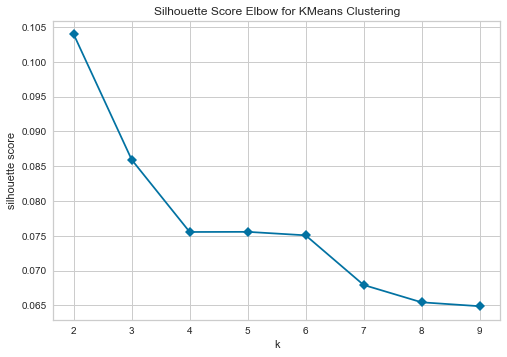

In [11]:
# Determine ideal number of clusters 

# Instantiate a scikit-learn K-Means model
kmeans = KMeans(random_state=0)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(kmeans, k = (2, 10), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(train)    
visualizer.poof();   

In [12]:
# Create a KMeans instance with 2 clusters and fit to the training data
model = KMeans(n_clusters = 2)
model.fit(train)

KMeans(n_clusters=2)

In [13]:
# View model inertia after fitting training data
train_inertia = round(model.inertia_)
print(train_inertia)

143246


In [14]:
# Calculate silhouette score for training data
train_silhouette = round(silhouette_score(train, model.labels_),3)
print(train_silhouette)

0.104


In [15]:
# Fit to test data
model.fit(test)

KMeans(n_clusters=2)

In [16]:
# Calculate silhouette score for test data
test_silhouette = round(silhouette_score(test, model.labels_),3)
print(test_silhouette)

0.104


#### Model Accuracy

Two metrics that can be used for measuring the quality of a K-Means clustering are the inertia and the silhouette score. The inertia "calculates the sum of distances of all the points within a cluster from the centroid of that cluster" (Sharma, 2020). Ideally, low scores are desired for the inertia measurement. Both the inertia for the training and test data are extremely high. It is higher for the training data, but I believe that is due to there being more data points in that data set, therefore it has more potential to spread out. Such high scores mean that the distance between the points in the clusters is large, and the clusters are very spread out.

The silhouette score describes the distance between the clusters. This score has a range between -1 and 1, with -1 meaning that there is no distance between clusters and 1 meaning that there is no overlap of data points in the clusters (Amelia, 2018). The scores for both the training and test data are approximately 0.1, which means there is much overlapping between the clusters.

In [17]:
# View model inertia after fitting testing data
test_inertia = round(model.inertia_)
print("The inertia for the training data is", train_inertia, "and is", test_inertia, "for the test data")
print("This is a difference of", train_inertia - test_inertia)

The inertia for the training data is 143246 and is 36137 for the test data
This is a difference of 107109


In [18]:
# Print the silhouette scores for the training and test data
print("The silhouette score for the training data is", train_silhouette, "and the score for the test data is", test_silhouette)

The silhouette score for the training data is 0.104 and the score for the test data is 0.104


#### Results

Based on the above accuracy measurements, the attempt at clustering the customers into distinct groups is a failure.  The large spread of the clusters and prevalent overlapping means that using the chosen parameters, I am unable to distinguish two separate groups of customers.  This means that I am unable to use the results of this method to predict whether or not a customer will terminate their services with the organization.

One limitation of my data analysis could be in the number of features used in clustering. In my research leading up to the execution of the K-Means method, I saw that it is possible to use this method on data with large amounts of features. Therefore, I kept a large number of features when deciding on what variables to include. It is possible that through trial and error, I could narrow the variables down to a smaller group to create distinct and tight clusters to provide more customer insight.

Based on the poor results of this analysis, I would recommend that the stakeholders in the telecommunications industry discard the results of this research. If they desire to have a distinct segmentation of their customers, they might task their analysts with attempting clustering again using different parameters. If their goal is just to determine whether a customer would churn, I would recommend using an algorithm such as Random Forest in which extremely accurate results were achieved using the majority of the customer data.

#### Sources

- Amelia, A. (2018, September 28). K-Means clustering: From A to Z. Retrieved February 20, 2021, from https://towardsdatascience.com/k-means-clustering-from-a-to-z-f6242a314e9a

- Paul, S. (2018, July 6). K-Means Clustering in Python with scikit-learn. Retrieved February 21, 2021, from https://www.datacamp.com/community/tutorials/k-means-clustering-python?fbclid=IwAR078hAiPA4WL6Wk6xSBFtPGcauFe34kuu6yBHaNBRRmQoGi1FwE6SKQKoI

- Sharma, P. (2020, October 18). K means Clustering: K means clustering algorithm in Python. Retrieved February 20, 2021, from https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/

- Urbonas, K. (n.d.). Customer Segmentation in Python. Retrieved February 20, 2021, from https://learn.datacamp.com/courses/customer-segmentation-in-python

- Wilson, B. (n.d.). Unsupervised Learning in Python. Retrieved February 16, 2021, from https://learn.datacamp.com/courses/unsupervised-learning-in-python

#### Helpful Sites Used in Coding Project

1. https://campus.datacamp.com/courses/dimensionality-reduction-in-python
2. https://stackoverflow.com/questions/24147278/how-do-i-create-test-and-train-samples-from-one-dataframe-with-pandas
3. https://blog.floydhub.com/introduction-to-k-means-clustering-in-python-with-scikit-learn/?fbclid=IwAR2I4kj59WvXc0VBdQTXWjKuqduvg8MDMA5CSXjSkGxB0R5fy_Hu44vqj1Q